# Demo: FEDS Near-Real Time (NRT) V.S. WFIGS Current Interagency Fire Perimeters for United States, December 1st 2023

### Summary

This notebook demonstrates the capabilities of the FEDS-PEC module to function on real time datasets for the entire US region. The FEDS input uses the `public.eis_fire_lf_perimeter_nrt` collection (updated every 5-10 mins), and compares against the WFIGS Current Interagency Fire Perimeters (updated every 5 minutes). 

Sources for demonstration:
- FEDS near real time perimeters, labeled as `"public.eis_fire_lf_perimeter_nrt"`, documentation can be viewed here: https://nasa-impact.github.io/veda-docs/notebooks/quickstarts/wfs.html and source can be viewed here: https://www.earthdata.nasa.gov/dashboard/data-catalog/fire/explore?projection=mercator%7C%7C&basemapid=satellite&datetime=2023-10-22T00%3A00%3A00.000Z&position=-119.8864%7C38.0971%7C9.56
- NIFC WFIGS Current Interagency Fire Perimeters, labeled as `"WFIGS_current_interagency_fire_perimeters"`, source can be viewed here: https://data-nifc.opendata.arcgis.com/datasets/nifc::wfigs-current-interagency-fire-perimeters/explore 


The FEDS input and reference input can use either a pre-defined setting or can accept (valid) user-written paths to shape files. 
- For Input all settings, please see **section INPUT SETTINGS of README.md**  
- Output settings can also be modified to control if calculations are printed, plotted, and/or stored into a file (with location and file type of choice); for more detail on outputs please see **section OUTPUT SETTINGS of README.md**

### Selected Example + Disclaimer

The selected choice for NRT demonstration is the entire United States Region

Disclaimer: users who run this notebook past the current date of Oct 22nd 2023 11 AM PDT may not be able to reproduce results shown here, as the perimeters may no longer exist in the updated datasets. 

#### Motivation 
By enabling NRT capabilities, users interested in the possible operational applications of the FEDS perimeter dataset can explore FEDS performance against official interagency perimeters on an efficient and stream-lined basis.


In [1]:
import sys
sys.path.append('/projects/my-public-bucket/VEDA-PEC')

import Utilities
import Input_FEDS
import Input_Reference
import Output_Calculation

from Input_FEDS import InputFEDS
from Input_Reference import InputReference
from Output_Calculation import OutputCalculation
from Utilities import *

In [2]:
# this is the ONLY thing users are intended to modify!
# inputs for searching FEDS and nifc sets

# START TIME
year_start = 2023
month_start = 11
day_start = 27
hour_start = 0
minute_start = 0
second_start = 0
tz_offset_hours_start = 0
tz_offset_minutes_start = 0
utc_offset_start = '00:00'

# END TIME
year_stop = 2023
month_stop = 12
day_stop = 2
hour_stop = 0
minute_stop = 0
second_stop = 0
tz_offset_hours_stop = 0
tz_offset_minutes_stop = 0
utc_offset_stop = '00:00'

# CRS - 4326 RECOMMENDED FEDS FIRE PERIM DEFAULT
crs = 3857 # 4326

# BBOX FOR SEARCH - [lon, lat, lon, lat]
# 38.018784, -83.251943
# 36.568817, -80.049151
search_bbox = ["-125.0", "24.396308", "-66.93457", "49.384358"] 


day_search_range = 7 # acceptable distance to search from feds -> reference (e.g. if refernce polygon is 8 days away, it is not included in calculations)

# FEDS INPUT SETTINGS  # [Change to FEDS Input settings]
feds_title = "firenrt"
feds_collection =  "public.eis_fire_lf_perimeter_nrt"
feds_access_type = "api" # or "local
feds_limit = 9000 # amount of features to consider for FEDS API access; warning appears if it misses any entries
feds_filter = False # False or a valid query: e.g. "farea>5 AND duration>2"
feds_apply_finalfire = True # set this to true if you want the only the latest fireID to be taken per unique FireID

# REFERENCE INPUT SETTINGS 
ref_title = "WFIGS_current_interagency_fire_perimeters" # this is a predefined set example
ref_control_type = "defined" # or "custom"
ref_custom_url = "none" # not custom for demo
ref_custom_read_type = "none"  # not custom for demo
ref_filter = False # False or a valid query

# OUTPUT SETTINGS - User discretion advised for path functionality
print_on = True
plot_on = True
name_for_output_file = "us_nrt_20231127_20231202_analysis"
output_format = "csv"
user_path = "/projects/my-public-bucket/VEDA-PEC/results"
output_maap_url = f"{user_path}/{name_for_output_file}.{output_format}"

### Argument Processing: format and check to report any issues
- Note: upon instance instantiation we can also get reports back of invalidity -> any warnings/errors should be addressed

In [3]:

# start date formatting
search_start = Utilities.format_datetime(year_start, 
                                         month_start, 
                                         day_start, 
                                         hour_start, 
                                         minute_start, 
                                         second_start, 
                                         tz_offset_hours_start, 
                                         tz_offset_minutes_start,
                                         utc_offset_start)
# stop date formatting
search_stop = Utilities.format_datetime(year_stop, 
                                        month_stop, 
                                        day_stop, 
                                        hour_stop, 
                                        minute_stop, 
                                        second_stop, 
                                        tz_offset_hours_stop, 
                                        tz_offset_minutes_stop,
                                        utc_offset_stop)

# bound check the bbox
assert Utilities.check_bbox(search_bbox), f"ERR: passed bbox {search_bbox} is not valid; check bounds"
assert  Utilities.check_crs(crs), f"ERR: invalid crs provided {crs}; please enter valid ESPG CRS number"

### Using Inputs: Instantiate Inputs + Calculation Output

With our inputs, we are ready to start; run this to get the program to fetch the FEDS candidates in the provided time/location window, along with an intersecting NIFC in the specific day range

In this case, we get the latest object of FEDS in the kincade zone + its NIFC closest match, which is about 6 days away and heavily intersecting

You may see an ERROR 1 occur; ignore this unless block throws actual exception...
You may see WARNING:fiona.ogrext:Expecting property name enclosed in double quotes: line 1 column 2 (char 1); you can ignore this error safely


ERROR 1: PROJ: proj_create_from_database: Open of /projects/env-feds/share/proj failed
Running FEDS-Reference Match Algorithm: 100%|██████████| 154/154 [00:25<00:00,  6.05polygon/s]


NO CALCULATION RESULTS, SKIP FEDS INDEX 753 & REFERENCE INDEX 753
NO CALCULATION RESULTS, SKIP FEDS INDEX 809 & REFERENCE INDEX 809
NO CALCULATION RESULTS, SKIP FEDS INDEX 83 & REFERENCE INDEX 83
NO CALCULATION RESULTS, SKIP FEDS INDEX 53 & REFERENCE INDEX 53
NO CALCULATION RESULTS, SKIP FEDS INDEX 768 & REFERENCE INDEX 768
NO CALCULATION RESULTS, SKIP FEDS INDEX 42 & REFERENCE INDEX 42
NO CALCULATION RESULTS, SKIP FEDS INDEX 78 & REFERENCE INDEX 78
NO CALCULATION RESULTS, SKIP FEDS INDEX 32 & REFERENCE INDEX 32
NO CALCULATION RESULTS, SKIP FEDS INDEX 786 & REFERENCE INDEX 786
NO CALCULATION RESULTS, SKIP FEDS INDEX 594 & REFERENCE INDEX 594
NO CALCULATION RESULTS, SKIP FEDS INDEX 224 & REFERENCE INDEX 224
NO CALCULATION RESULTS, SKIP FEDS INDEX 646 & REFERENCE INDEX 646
NO CALCULATION RESULTS, SKIP FEDS INDEX 24 & REFERENCE INDEX 24
NO CALCULATION RESULTS, SKIP FEDS INDEX 98 & REFERENCE INDEX 98
NO CALCULATION RESULTS, SKIP FEDS INDEX 163 & REFERENCE INDEX 163
NO CALCULATION RESULTS, 

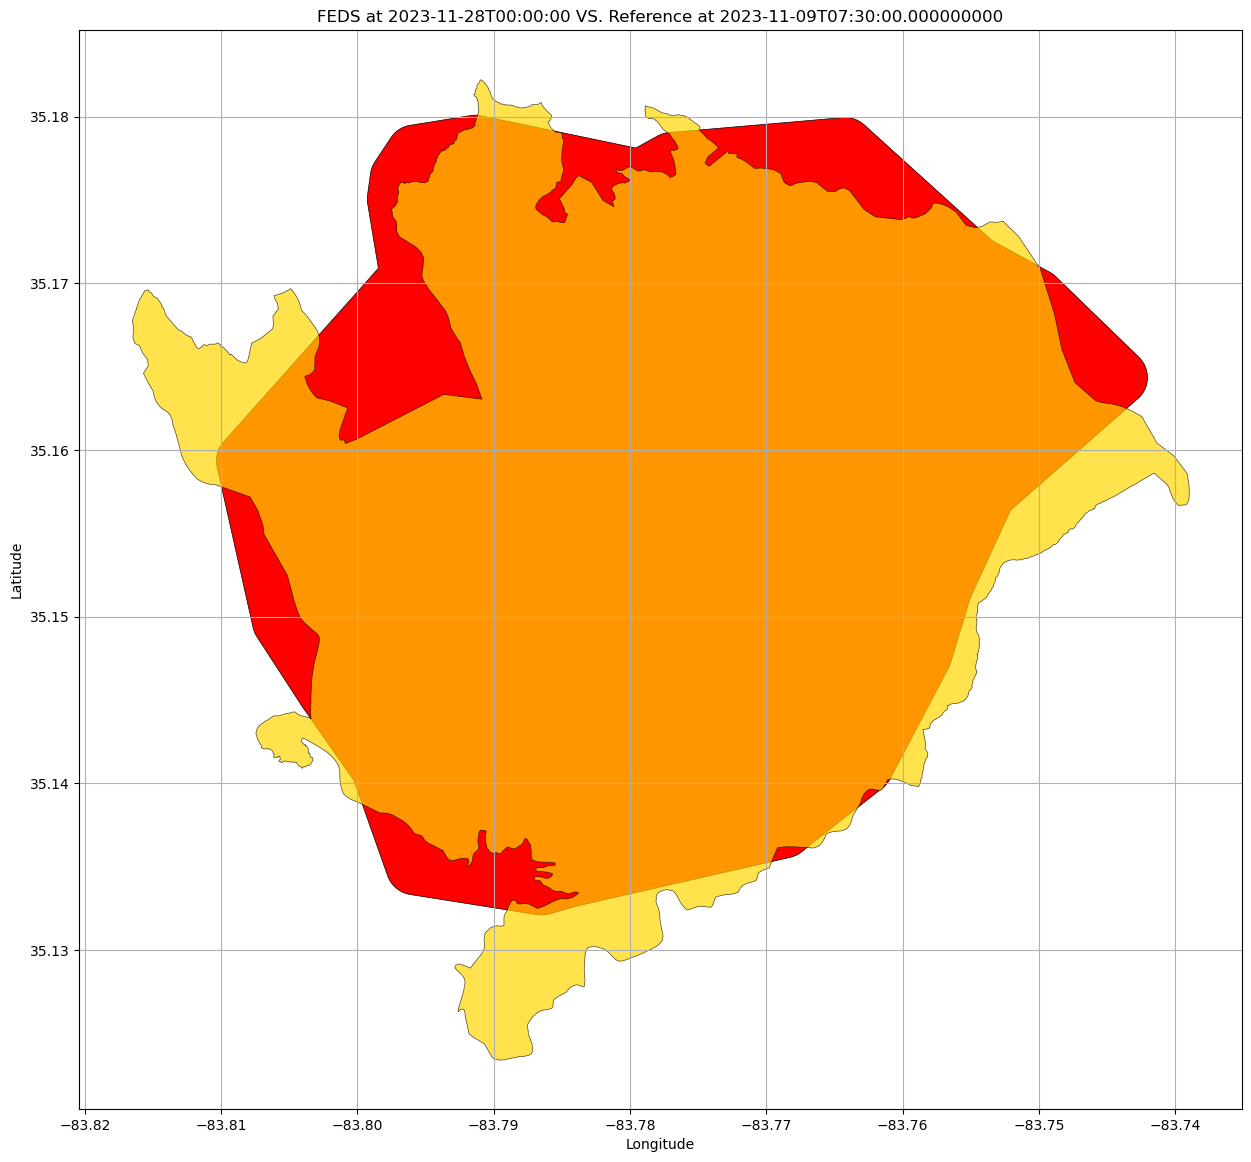

PLOTTING COMPLETE


CSV output complete! Check file /projects/my-public-bucket/VEDA-PEC/results/us_nrt_20231127_20231202_analysis.csv for results. NOTE: None result rows were excluded.


In [4]:
# create instances to track properties
print('You may see an ERROR 1 occur; ignore this unless block throws actual exception...')
print('You may see WARNING:fiona.ogrext:Expecting property name enclosed in double quotes: line 1 column 2 (char 1); you can ignore this error safely')

import warnings
warnings.filterwarnings('ignore')
    
feds_firenrt = InputFEDS(
                 feds_title, 
                 feds_collection, 
                 search_start,
                 search_stop,
                 search_bbox,
                 crs,
                 feds_access_type,
                 feds_limit,
                 feds_filter,
                 feds_apply_finalfire
                )

nifc_search = InputReference( 
                 search_start,
                 search_stop,
                 search_bbox,
                 crs,
                 ref_title,
                 ref_control_type,
                 ref_custom_url,
                 ref_custom_read_type,
                 ref_filter,
                )

my_output = OutputCalculation(
                feds_firenrt,
                nifc_search,
                output_format, 
                output_maap_url,
                day_search_range,
                print_on,
                plot_on
                )